In [1]:
#!ls ~/trained_models/
import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

In [2]:
from pathlib import Path
from datatype_recovery.models.dataset import load_dataset_from_path
from datatype_recovery.models.dataset.encoding import *

In [4]:
# dataset_path = Path.home()/'datasets/test_ds'
# dataset_path = Path.home()/'datasets/trainset_astera_full_5hops_nocomp'

# dataset_path = Path.home()/'datasets/coreutils_full_5hops'
dataset_path = Path.home()/'datasets/stateformer33'

# model_path = Path.home()/'trained_models/RERUN_structural_3out_4hops_nocomp.pt'
# model_path = Path.home()/'trained_models/withedges_4out_4hops_nocomp.pt'
# model_path = Path.home()/'trained_models/dragon_4out_5hops_coreutils__COPY.pt'

# model_path = Path.home()/'trained_models/dragon_5hops_ffmpeg__COPY.pt'
# model_path = Path.home()/'trained_models/dragon_5hops_ffmpeg_balanced__EPOCH42.pt'
# model_path = Path.home()/'trained_models/dragon_5hops_256ch_balanced.pt'
# model_path = Path.home()/'trained_models/dragon_5hops_32ch_balanced.pt'
# model_path = Path.home()/'trained_models/dragon_5hops_64ch_balanced.pt'
model_path = Path.home()/'trained_models/dragon_5hops_5heads_3linear/dragon_5hops_5heads_3linear_ep50.pt'

# eval_model_on_dataset(model_path, 'cuda:3', dataset_path)

In [5]:
dataset = load_dataset_from_path(dataset_path)
from datatype_recovery.models.dataset import InMemTypeSequenceDataset

df = dataset.read_vars_csv()
df

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,LocRegName_Debug,LocOffset_Debug,TypeCategory_Debug,TypeSeq_Debug,HasDWARF,TypeJson_Debug,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip
0,1063561,"1066,1079",uVar1,uint32,register,eax,0.0,BUILTIN,uint32,uVar1,...,eax,0.0,BUILTIN,uint32,False,"{""kind"": ""Builti...",1000,l,False,False
1,1063561,"1113,1124,1150",uVar2,uint64,register,rax,0.0,BUILTIN,uint64,eVar2,...,eax,0.0,BUILTIN,int32,False,"{""kind"": ""Builti...",1000,l,False,False
2,1063561,"363,367,377,392",dVar3,double,register,xmm0_qa,4608.0,BUILTIN,double,dVar4,...,xmm0_qa,4608.0,BUILTIN,double,False,"{""kind"": ""Builti...",1000,l,False,False
3,1063561,"264,296,330,775,810",local_20,char*,stack,NaN,-32.0,PTR,"PTR,char",endptr,...,NaN,-32.0,PTR,"PTR,char",True,"{""kind"": ""Pointe...",1000,l,False,False
4,1063561,"278,363",local_18,double,stack,NaN,-24.0,BUILTIN,double,v,...,NaN,-24.0,BUILTIN,double,True,"{""kind"": ""Builti...",1000,l,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955410,1107165,"43,87",param_2,int32,register,esi,48.0,BUILTIN,int32,cmd,...,esi,48.0,BUILTIN,int32,True,"{""kind"": ""Builti...",33200,p,False,False
955411,1107259,30,param_1,BIO*,register,rdi,56.0,PTR,"PTR,STRUCT",b,...,rdi,56.0,PTR,"PTR,STRUCT",True,"{""kind"": ""Pointe...",33200,p,False,False
955412,1107316,30,param_1,BIO*,register,rdi,56.0,PTR,"PTR,STRUCT",b,...,rdi,56.0,PTR,"PTR,STRUCT",True,"{""kind"": ""Pointe...",33200,p,False,False
955413,1107374,71,param_1,uint64,register,rdi,56.0,BUILTIN,uint64,b,...,rdi,56.0,PTR,"PTR,STRUCT",True,"{""kind"": ""Pointe...",33200,p,False,False


In [7]:
from datatype_recovery.models.eval import make_predictions_on_dataset

max_true_len = df.TypeSeq_Debug.apply(lambda ts: len(ts.split(','))).max()
model_pred = make_predictions_on_dataset(model_path, 'cpu', dataset, max_true_len)
model_pred

DragonModel(
  (gat_layers): ModuleList(
    (0): GATConv(133, 128, heads=5)
    (1-4): 4 x GATConv(640, 128, heads=5)
  )
  (pred_head): Sequential(
    (0): Linear(in_features=640, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(128, 92, bias=True)
  )
)
Running eval...


100%|██████████| 1889/1889 [28:43<00:00,  1.10it/s]


,BinaryId,FunctionStart,Signature,Vartype,RawPred,Pred
0,1000,1063561,"1066,1079",l,uint32,uint32
1,1000,1063561,"1113,1124,1150",l,char,char
2,1000,1063561,"363,367,377,392",l,double,double
3,1000,1063561,"264,296,330,775,810",l,"PTR,char","PTR,char"
4,1000,1063561,"278,363",l,double,double
...,...,...,...,...,...,...
955410,33200,1107374,"71,76",l,int32,int32
955411,33200,1107374,"42,71",l,uint64,uint64
955412,33200,1107374,"50,80,112",l,uint64,uint64
955413,33200,1107374,71,p,"PTR,FUNC","PTR,FUNC"


In [8]:
mdf = df.merge(model_pred, how='right', on=['BinaryId','FunctionStart','Signature','Vartype'])
mdf

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,TypeCategory_Debug,TypeSeq_Debug,HasDWARF,TypeJson_Debug,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip,RawPred,Pred
0,1063561,"1066,1079",uVar1,uint32,register,eax,0.0,BUILTIN,uint32,uVar1,...,BUILTIN,uint32,False,"{""kind"": ""Builti...",1000,l,False,False,uint32,uint32
1,1063561,"1113,1124,1150",uVar2,uint64,register,rax,0.0,BUILTIN,uint64,eVar2,...,BUILTIN,int32,False,"{""kind"": ""Builti...",1000,l,False,False,char,char
2,1063561,"363,367,377,392",dVar3,double,register,xmm0_qa,4608.0,BUILTIN,double,dVar4,...,BUILTIN,double,False,"{""kind"": ""Builti...",1000,l,False,False,double,double
3,1063561,"264,296,330,775,810",local_20,char*,stack,NaN,-32.0,PTR,"PTR,char",endptr,...,PTR,"PTR,char",True,"{""kind"": ""Pointe...",1000,l,False,False,"PTR,char","PTR,char"
4,1063561,"278,363",local_18,double,stack,NaN,-24.0,BUILTIN,double,v,...,BUILTIN,double,True,"{""kind"": ""Builti...",1000,l,False,False,double,double
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955410,1107374,"71,76",iVar1,int32,register,eax,0.0,BUILTIN,int32,iVar1,...,BUILTIN,int32,False,"{""kind"": ""Builti...",33200,l,False,False,int32,int32
955411,1107374,"42,71",sVar2,uint64,register,rax,0.0,BUILTIN,uint64,size,...,BUILTIN,uint64,False,"{""kind"": ""Builti...",33200,l,False,False,uint64,uint64
955412,1107374,"50,80,112",local_18,uint64,stack,NaN,-24.0,BUILTIN,uint64,m,...,BUILTIN,uint64,True,"{""kind"": ""Builti...",33200,l,False,False,uint64,uint64
955413,1107374,71,param_1,uint64,register,rdi,56.0,BUILTIN,uint64,b,...,PTR,"PTR,STRUCT",True,"{""kind"": ""Pointe...",33200,p,False,False,"PTR,FUNC","PTR,FUNC"


In [9]:
# compute accuracy for levels 1-3 (first type element only, first two elements, etc...)
for i in range(4):
    mdf[f'TypeSeqL{i+1}_Debug'] = mdf.TypeSeq_Debug.apply(lambda x: ",".join(x.split(',')[:i+1]))
    mdf[f'PredL{i+1}'] = mdf.Pred.apply(lambda x: ",".join(x.split(',')[:i+1]))

In [10]:
acc_corrected = len(mdf[mdf.TypeSeq_Debug==mdf.Pred])/len(mdf)*100
print(f'Accuracy (corrected): {acc_corrected:.2f}%')

# TODO: confusion matrix, F1, precision, recall from this mdf too

Accuracy (corrected): 72.44%


In [11]:
acc_data = []
for i in range(4):
    acc_i = len(mdf[mdf[f'TypeSeqL{i+1}_Debug']==mdf[f'PredL{i+1}']])/len(mdf)*100
    print(f'Level-{i+1} Accuracy (corrected): {acc_i:.2f}%')
    # acc_data.append((f'Level-{i+1} Accuracy', acc_i))
    acc_data.append((i+1, acc_i))

Level-1 Accuracy (corrected): 87.80%
Level-2 Accuracy (corrected): 73.06%
Level-3 Accuracy (corrected): 72.44%
Level-4 Accuracy (corrected): 72.44%


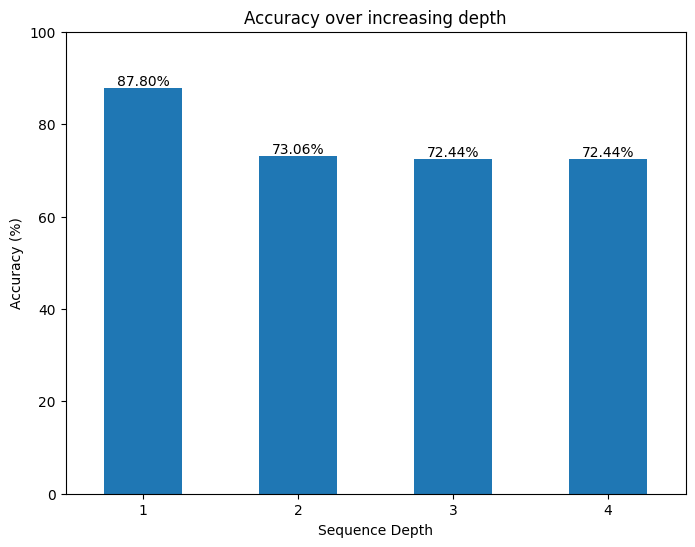

In [12]:
ax = pd.DataFrame(acc_data, columns=['Seq Depth','Accuracy']).plot(kind='bar', x='Seq Depth', y='Accuracy', rot=0, figsize=(8,6),
    xlabel='Sequence Depth', ylabel='Accuracy (%)', title='Accuracy over increasing depth', legend=False,
    ylim=[0, 100])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt=lambda x: f'{x:.2f}%' if x > 5 else '')


In [13]:
category = 'uchar'
print(f'{len(mdf[mdf.TypeSeqL1_Debug==category]):,} samples')
len(mdf[(mdf.TypeSeqL1_Debug==mdf.PredL1)&(mdf.TypeSeqL1_Debug==category)])/len(mdf[mdf.TypeSeqL1_Debug==category])*100

9,109 samples


93.64364913821495

Text(0, 0.5, 'Accuracy (%)')

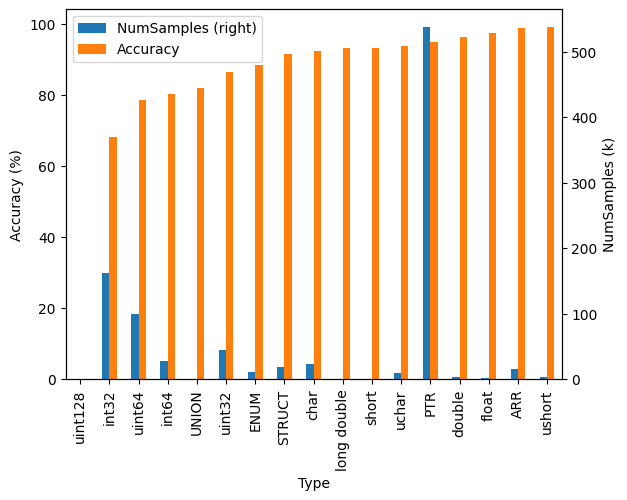

In [14]:
adf = pd.DataFrame(mdf.groupby('TypeSeqL1_Debug').pipe(lambda gb: [(val, len(df)/1000, len(df[df.TypeSeqL1_Debug==df.PredL1])/len(df)*100) for val, df in gb]), columns=['Type', 'NumSamples', 'Accuracy'])\
    .set_index('Type')\
    .sort_values('Accuracy')

ax = adf.plot(kind='bar', secondary_y='NumSamples', ylabel='NumSamples (k)')
ax.set_ylabel('Accuracy (%)')
# adf.plot(kind='bar', y='NumSamples', ax=ax, secondary_y=True)

Text(0, 0.5, 'Accuracy (%)')

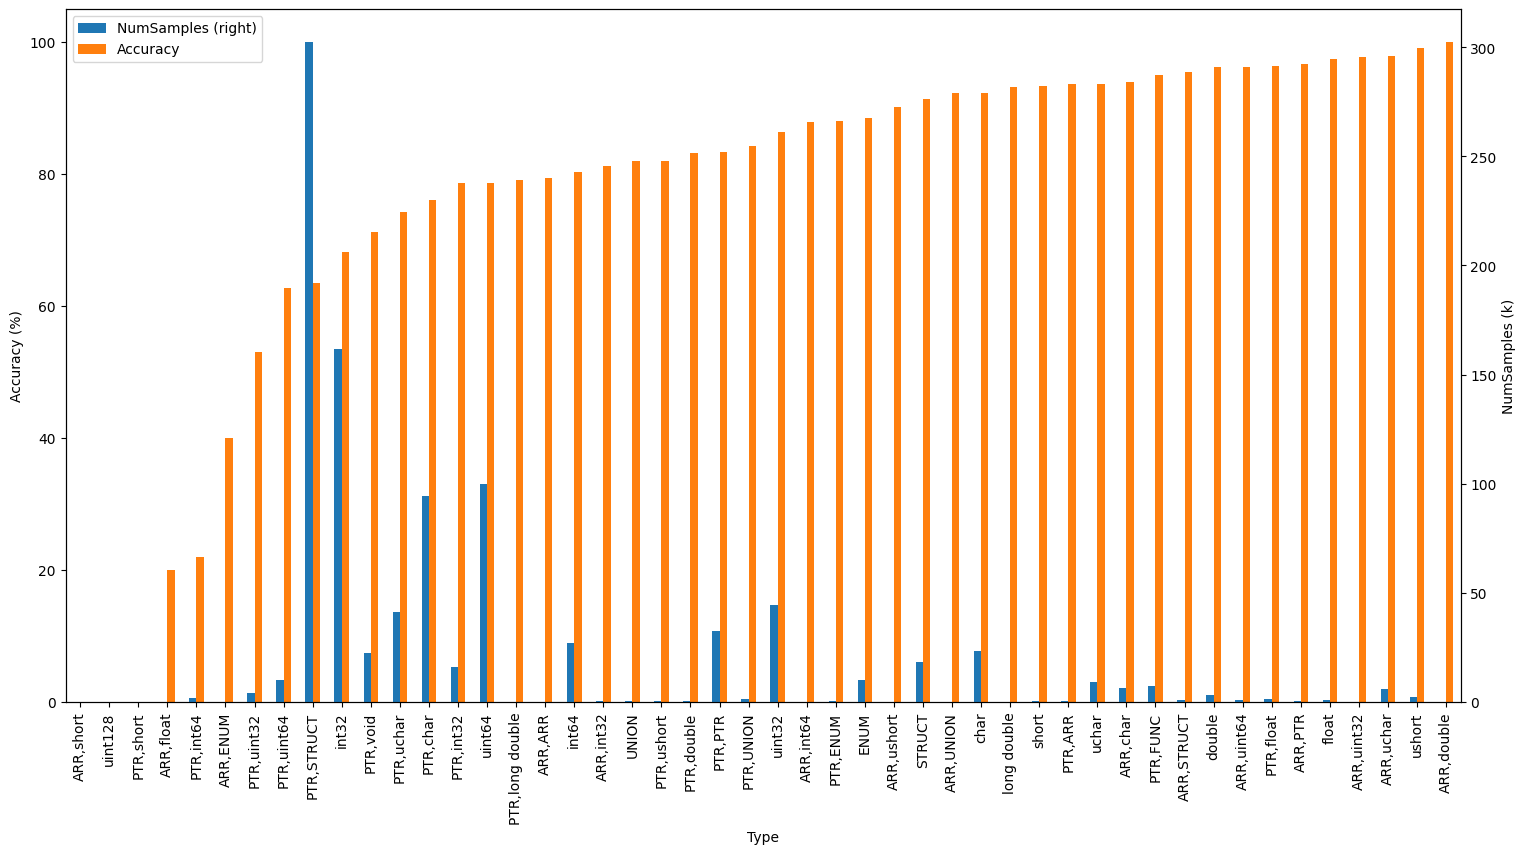

In [15]:
adf = pd.DataFrame(mdf.groupby('TypeSeqL2_Debug').pipe(lambda gb: [(val, len(df)/1000, len(df[df.TypeSeqL2_Debug==df.PredL2])/len(df)*100) for val, df in gb]), columns=['Type', 'NumSamples', 'Accuracy'])\
    .set_index('Type')\
    .sort_values('Accuracy')

ax = adf.plot(kind='bar', secondary_y='NumSamples', ylabel='NumSamples (k)', figsize=(18,9))
ax.set_ylabel('Accuracy (%)')

In [16]:
def calc_accuracy(df):
    return len(df[df.TypeSeq_Debug==df.Pred])/len(df)*100

# calc_accuracy(mdf[mdf.LocType_Debug=='register'])
# calc_accuracy(mdf[mdf.HasDWARF])

mdf.groupby('HasDWARF').pipe(lambda gb: pd.DataFrame([(val, calc_accuracy(df)) for val, df in gb], columns=['HasDWARF', 'Accuracy']))#.plot(kind='bar')

,HasDWARF,Accuracy
0,False,73.823341
1,True,71.558536


In [17]:
xdf = mdf[mdf.TypeSeq_Debug=='PTR,STRUCT']
xdf.groupby('Vartype').count()/len(xdf)*100
xdf[xdf.TypeSeq_Debug!=xdf.Pred].groupby('LocType_Debug').count()
xdf = xdf[xdf.TypeSeq_Debug!=xdf.Pred][['Pred','TypeSeq_Debug','Signature']]
xdf['NumRefs'] = xdf.Signature.apply(lambda s: len(s.strip(',')))
xdf.sort_values('NumRefs')

,Pred,TypeSeq_Debug,Signature,NumRefs
285154,int64,"PTR,STRUCT",8,1
136447,int64,"PTR,STRUCT",8,1
211697,int64,"PTR,STRUCT",8,1
162475,int64,"PTR,STRUCT",8,1
198598,int64,"PTR,STRUCT",8,1
...,...,...,...,...
414416,"PTR,char","PTR,STRUCT","983,1133,1270,13...",2063
412515,UNION,"PTR,STRUCT","73,418,477,491,5...",2108
453035,"PTR,void","PTR,STRUCT","94,130,971,1099,...",2514
88415,"PTR,char","PTR,STRUCT","63,198,244,297,3...",2636


In [18]:
mdf.groupby('TypeSeq_Debug').pipe(lambda gb: pd.DataFrame([(val, calc_accuracy(df), len(df)) for val, df in gb], columns=['TypeSeq_Debug', 'Accuracy', 'Count']))\
    .sort_values('Count',ascending=False)#.plot(kind='bar')

,TypeSeq_Debug,Accuracy,Count
65,"PTR,STRUCT",63.522897,302291
84,int32,68.237613,161877
91,uint64,78.594252,99833
67,"PTR,char",76.127217,94547
90,uint32,86.443234,44428
...,...,...,...
9,"ARR,PTR,FUNC",0.000000,1
1,"ARR,ARR,PTR,char",100.000000,1
5,"ARR,ARR,int64",100.000000,1
4,"ARR,ARR,int32",0.000000,1


In [19]:
#mdf.groupby('Pred').count()

In [20]:
# mdf[mdf.Pred.apply(lambda x: 'COMP' in x)]

In [21]:
print(f'Source-level variables make up {len(mdf[(mdf.HasDWARF)])/len(mdf)*100:.2f}% of the dataset')

Source-level variables make up 60.86% of the dataset


In [22]:
mdf_srcvars = mdf.loc[mdf.HasDWARF,:]

In [23]:
acc_corrected_src = len(mdf_srcvars[mdf_srcvars.TypeSeq_Debug==mdf_srcvars.Pred])/len(mdf_srcvars)*100
print(f'Accuracy (corrected) on source-level vars: {acc_corrected_src:.2f}%')

Accuracy (corrected) on source-level vars: 71.56%


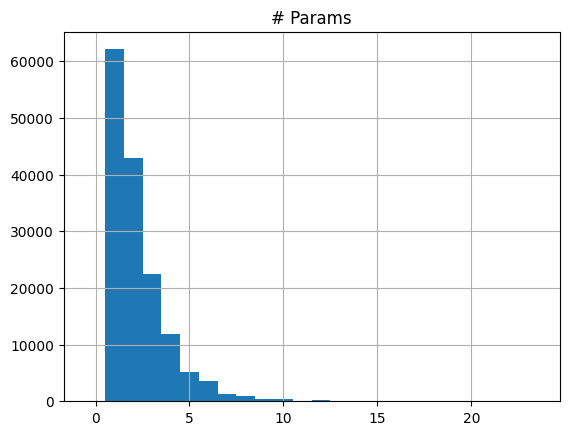

In [24]:
ax = df[(df.Vartype=='p')&(~df.IsReturnType_Debug)].groupby('FunctionStart').count()[['BinaryId']].rename({'BinaryId': '# Params'},axis=1).hist(
    # figsize=(18,5),
    bins=[x-0.5 for x in range(25)],
)
# ax[0][0].set_ylim([0, 500])

In [25]:
dataset_path

PosixPath('/home/cls0027/datasets/stateformer33')

In [26]:
# TODO: eval_model(dataset, model, filter_dataset=lambda df: df[df.HasDWARF])
# --> need to calculate the pred_df ONLY ONCE but allow multiple metrics/evals to occur

from typing import Callable

class EvalSubset:
    '''
    Represents a subset of the overall dataset that will be evaluated
    '''
    def __init__(self, name:str, filter_dataset:Callable[[pd.DataFrame], pd.DataFrame]) -> None:
        self.name = name
        self.filter_dataset = filter_dataset


In [27]:
acc_raw = len(mdf[mdf.TypeSeq_Debug==mdf.RawPred])/len(mdf)*100
acc_raw

72.31663727280815

In [28]:
len(df[(df.TypeSeq_Debug!='COMP')&(~df.IsReturnType_Debug)])

955415

In [29]:
# df['Label'] =
df.loc[df.TypeSeq_Debug=='COMP','Label'] = 'COMP'
df.loc[df.IsReturnType_Debug, 'Label'] = 'ReturnType'
df.Label = df.Label.fillna('Local/param')

In [30]:
#df = df.drop('Label', axis=1)

<Axes: xlabel='Label'>

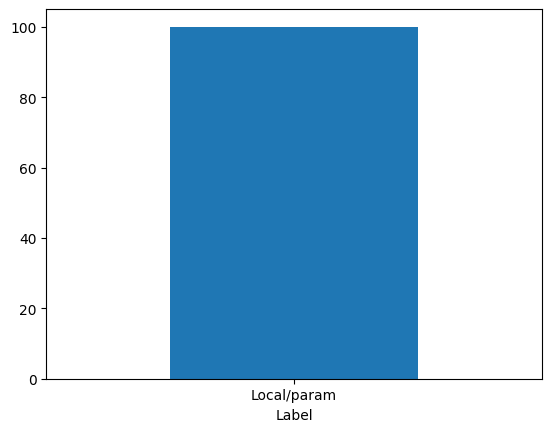

In [31]:
(df.groupby('Label').count().BinaryId/len(df)*100).plot(kind='bar', rot=0)


In [32]:
36992+15872+20

52884

In [33]:
counts = mdf.groupby('TypeSeq_Debug').count().BinaryId
# counts.sort_values()/len(mdf)
# counts.sort_index()

In [34]:
counts = mdf.groupby('TypeSeq_Debug').count()[['BinaryId']]
counts['TypeSeqLen'] = [len(x.split(',')) for x in counts.index]

In [35]:
# counts.sort_values('TSL').BinaryId/len(mdf)*100
order_idx = sorted(counts.index, key=lambda x: f'{len(x.split(","))}{x}')
counts.loc[order_idx]
(counts.pivot(columns='TypeSeqLen', values='BinaryId')/len(mdf)*100).loc[order_idx]

TypeSeqLen,1,2,3,4,5
TypeSeq_Debug,,,,,
ENUM,1.041537,NaN,NaN,NaN,NaN
STRUCT,1.916445,NaN,NaN,NaN,NaN
UNION,0.055787,NaN,NaN,NaN,NaN
char,2.426694,NaN,NaN,NaN,NaN
double,0.325513,NaN,NaN,NaN,NaN
...,...,...,...,...,...
"PTR,PTR,PTR,char",NaN,NaN,NaN,0.018631,NaN
"PTR,PTR,PTR,uchar",NaN,NaN,NaN,0.005233,NaN
"PTR,PTR,PTR,uint64",NaN,NaN,NaN,0.000105,NaN


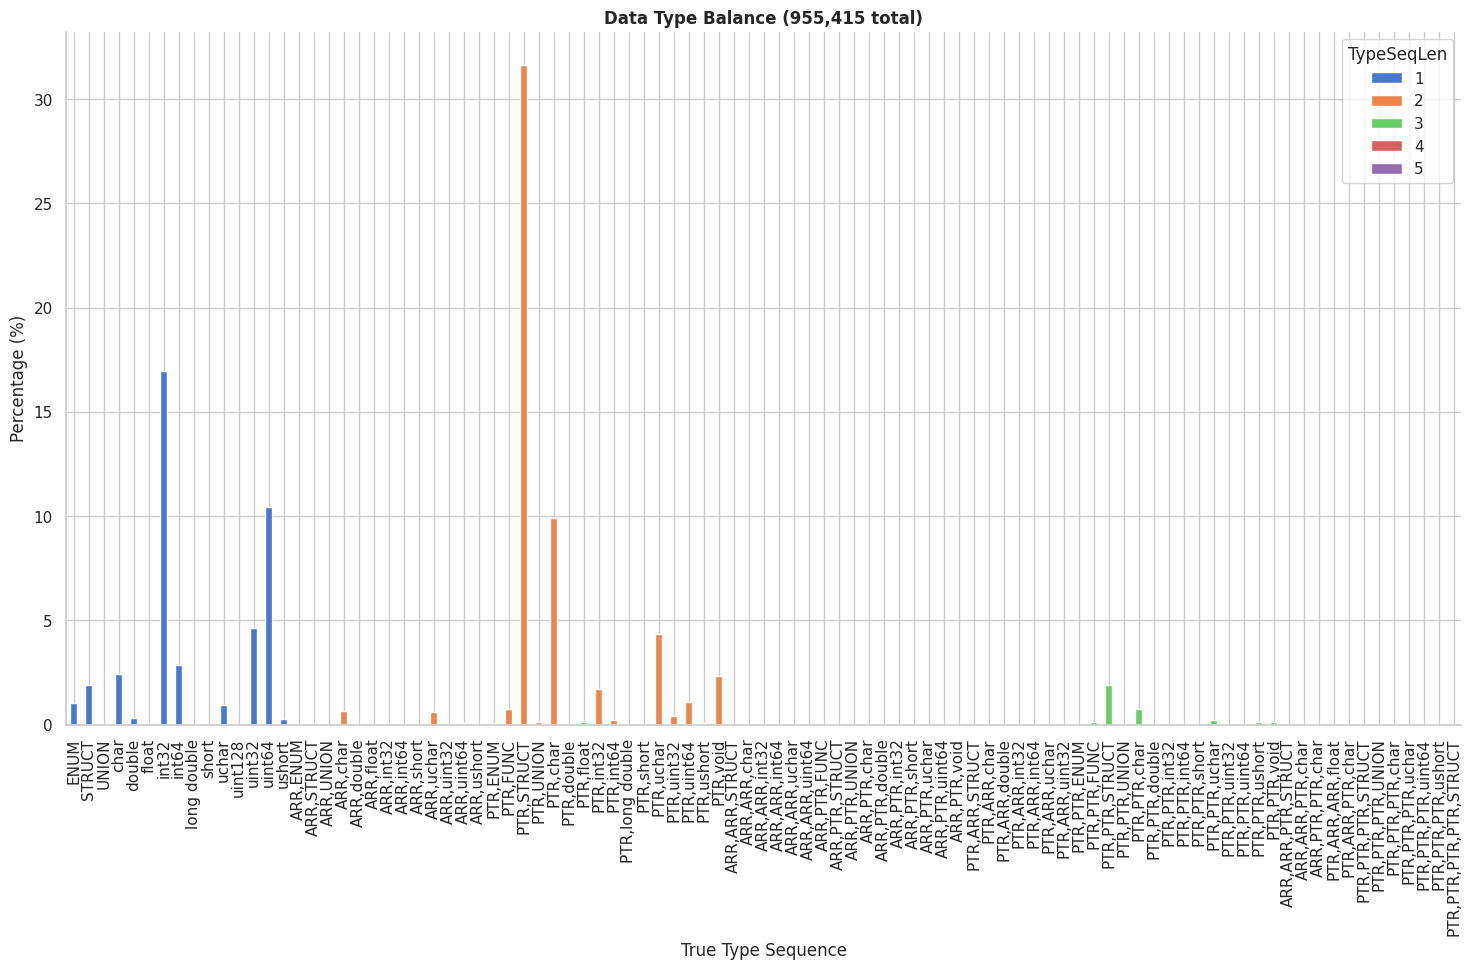

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns

# context: talk, notebook, paper, poster
# palette: muted, Paired, hls, husl, pastel, bright, deep, dark, colorblind
sns.set_theme(style='whitegrid', context='notebook', palette='muted')

order_idx = sorted(counts.index, key=lambda x: f'{len(x.split(","))}{x}')
bal_df = counts.pivot(columns='TypeSeqLen', values='BinaryId').loc[order_idx]/len(mdf)*100

ax = bal_df.plot(kind='bar', stacked=True, figsize=(18, 9))

ax.set_title(f'Data Type Balance ({len(mdf):,} total)', fontweight='bold')#, fontsize=16)
ax.set_xlabel('True Type Sequence')#, fontweight='bold')
ax.set_ylabel('Percentage (%)')
# ax.set_ylim([0, 0.6])
sns.despine()

# Structure Balance

In [37]:
# mdf['HasSTRUCT'] = mdf.TypeSeq_Debug.apply(lambda x: 'STRUCT' in x)
# mdf.groupby('HasSTRUCT').count().BinaryId/len(mdf)*100
sns.set_theme(style='whitegrid', context='talk', palette='muted')# font='Ubuntu')

structs_df = (mdf.groupby(mdf.TypeSeq_Debug.apply(lambda x: 'STRUCT' in x)).count()[['BinaryId']]/len(mdf)*100)
structs_df = structs_df.transpose().reset_index(drop=True).rename({False: 'Other', True: 'STRUCT'},axis=1).rename({0: 'Balance'})
structs_df

TypeSeq_Debug,Other,STRUCT
Balance,64.370666,35.629334


(-0.5, 0.85)

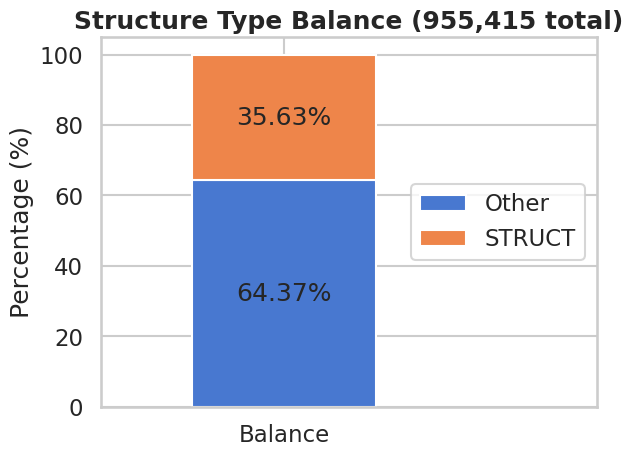

In [38]:
ax = structs_df.plot(kind='bar',
    # figsize=(8,8),
    xlabel='',
    ylabel='Percentage (%)',
    stacked=True,
    rot=0,
)
ax.legend(loc='right')
ax.set_title(f'Structure Type Balance ({len(mdf):,} total)', fontweight='bold')#, fontsize=16)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')
ax.set_xlim([-0.5, 0.85])

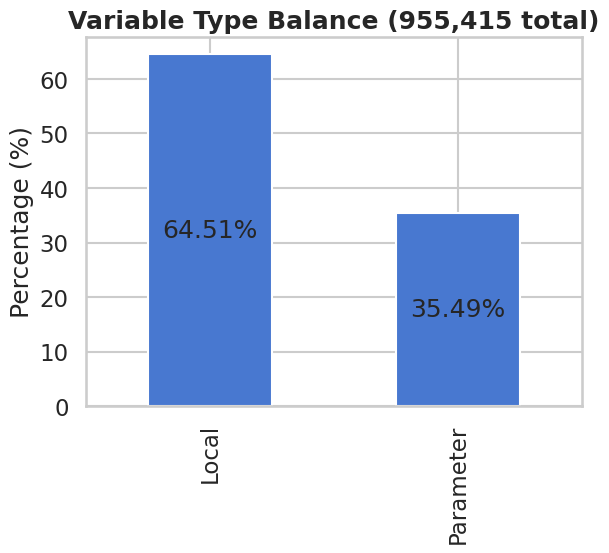

In [39]:
vtype_df = mdf.groupby('Vartype').count()[['BinaryId']]/len(mdf)*100
vtype_df.index = vtype_df.index.map({'l': 'Local', 'p': 'Parameter'})
ax = vtype_df.plot(kind='bar',
    xlabel='',
    ylabel='Percentage (%)',
    legend=False,
)
ax.set_title(f'Variable Type Balance ({len(mdf):,} total)', fontweight='bold')#, fontsize=16)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center')

In [40]:
import pandas as pd

# pd.read_csv(dataset.root/dataset.raw_file_names[0])
from datatype_recovery.models.dataset import TypeSequenceDataset

ds = TypeSequenceDataset(dataset_path)

In [41]:
exp_runs = pd.read_csv(ds.exp_runs_path)
exp_runs

,RunGid,RunFolder,BinariesCsv,FuncsCsv,ParamsCsv,LocalsCsv
0,0,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...
1,1,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...
2,2,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...
3,3,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...
4,4,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...
5,5,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...
6,6,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...
7,7,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...
8,8,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...
9,9,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...,/home/cls0027/ex...


In [42]:
import pandas as pd
from pathlib import Path
bdf = pd.read_csv(Path.home()/'datasets/coreutils_5hops/raw/binaries.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/cls0027/datasets/coreutils_5hops/raw/binaries.csv'

In [ ]:
bdf[bdf.BinaryId==1010]

In [ ]:
ldf = pd.read_csv(Path.home()/'exp_builds/coreutils.exp/rundata/run1/locals.csv')
ldf[ldf.FunctionStart==0x10154b]

In [ ]:
!ls ~/exp_builds/coreutils.exp/rundata/run1/19.printenv/ast_dumps/stripped/ | grep 10154
!echo ""
!ls ~/exp_builds/coreutils.exp/rundata/run1/19.printenv/ast_dumps/stripped/ | grep 10154

# TODO: fix this logic - split on '-' and THEN match name.log

In [ ]:
!ls ~/exp_builds/coreutils.exp/rundata/run1/19.printenv/

fdf = pd.read_csv(Path.home()/'exp_builds/coreutils.exp/rundata/run1/19.printenv/functions.csv')
fdf[fdf.FunctionName_DWARF.isna()]
len(fdf.loc[fdf.FunctionName_DWARF.isna(),:])
len(fdf)
fdf.loc[fdf.FunctionName_DWARF.isna(),:]